## Bike Sharing

In [2]:
import numpy as np
import pandas as pd

#### 1. Dataset Load

In [3]:
# 훈련 데이터 Load
train = pd.read_csv('data/bike-sharing/train.csv', parse_dates=['datetime'])

In [7]:
print(train.shape)
print(train.columns)
print(train.info())
train.head()

(10886, 12)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# 테스트 데이터 Load
test = pd.read_csv('data/bike-sharing/test.csv', parse_dates=['datetime'])

In [9]:
print(test.shape)
print(test.columns)
print(test.info())
test.head()

(6493, 9)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# season 컬럼 : 계절별 count 확인
train.groupby('season')['season'].count()

season
1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64

In [17]:
# groupby() 를 사용한 함수 정의
def mycount(df, col_name):
    return df.groupby(col_name)[col_name].count()

In [21]:
print('train: ', mycount(train, 'holiday'))
print('test: ', mycount(test, 'holiday'))

train:  holiday
0    10575
1      311
Name: holiday, dtype: int64
test:  holiday
0    6304
1     189
Name: holiday, dtype: int64


In [22]:
print('train: ', mycount(train, 'workingday'))
print('test: ', mycount(test, 'workingday'))

train:  workingday
0    3474
1    7412
Name: workingday, dtype: int64
test:  workingday
0    2040
1    4453
Name: workingday, dtype: int64


In [23]:
print('train: ', mycount(train, 'windspeed'))
print('test: ', mycount(test, 'windspeed'))

train:  windspeed
0.0000     1313
6.0032      872
7.0015     1034
8.9981     1120
11.0014    1057
12.9980    1042
15.0013     961
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
36.9974      22
39.0007      27
40.9973      11
43.0006      12
43.9989       8
46.0022       3
47.9988       2
50.0021       1
51.9987       1
56.9969       2
Name: windspeed, dtype: int64
test:  windspeed
0.0000     867
6.0032     553
7.0015     583
8.9981     618
11.0014    638
12.9980    615
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
36.9974     17
39.0007     17
40.9973     12
43.0006      2
43.9989      3
46.0022      2
50.0021      1
54.0020      2
55.9986      1
Name: windspeed, dtype: int64


In [33]:
# 훈련 데이터의 datetime 컬럼의 값을 년/월/일/시/분/초/요일 로 분리해서 새로운 컬럼 생성하기
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

In [40]:
print(train.shape)
print(train.columns)
train.loc[:, ['datetime', 'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second', 'datetime-dayofweek']].head()

(10886, 19)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek'],
      dtype='object')


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [37]:
# 테스트 데이터의 datetime 컬럼의 값을 년/월/일/시/분/초/요일 로 분리해서 새로운 컬럼 생성하기
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

In [39]:
print(test.shape)
print(test.columns)
test.loc[:, ['datetime', 'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second', 'datetime-dayofweek']].head()

(6493, 16)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [63]:
print(mycount(train, 'datetime-day'))
print(mycount(test, 'datetime-day'))

datetime-day
1     575
2     573
3     573
4     574
5     575
6     572
7     574
8     574
9     575
10    572
11    568
12    573
13    574
14    574
15    574
16    574
17    575
18    563
19    574
Name: datetime-day, dtype: int64
datetime-day
20    574
21    574
22    569
23    573
24    573
25    572
26    567
27    552
28    563
29    526
30    514
31    336
Name: datetime-day, dtype: int64


### 2. Visualization(시각화)

In [43]:
# jupyter notebook 에서 그래프가 보인게 한다.
# %matplotlib inline : 읽기 전용
# %matplotlib notebook : 수정 가능
%matplotlib inline

In [44]:
# seaborm 로딩
import seaborn as sns

##### 2.1 CountPlot() (bar graph)
* x, y 축을 동시에 지정할 수 없고, x 나 y 둘 중 하나만 사용할 수 있다.

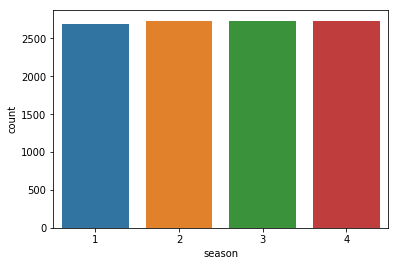

In [50]:
sns.countplot(data=train, x='season')

In [ ]:
##### 2.2 BarPlot
* barplot 은 x, y 축 모두 값을 지정할 수 있다.
* 1 figure 에 6개의 plot 을 그리기

In [51]:
import matplotlib.pyplot as plt

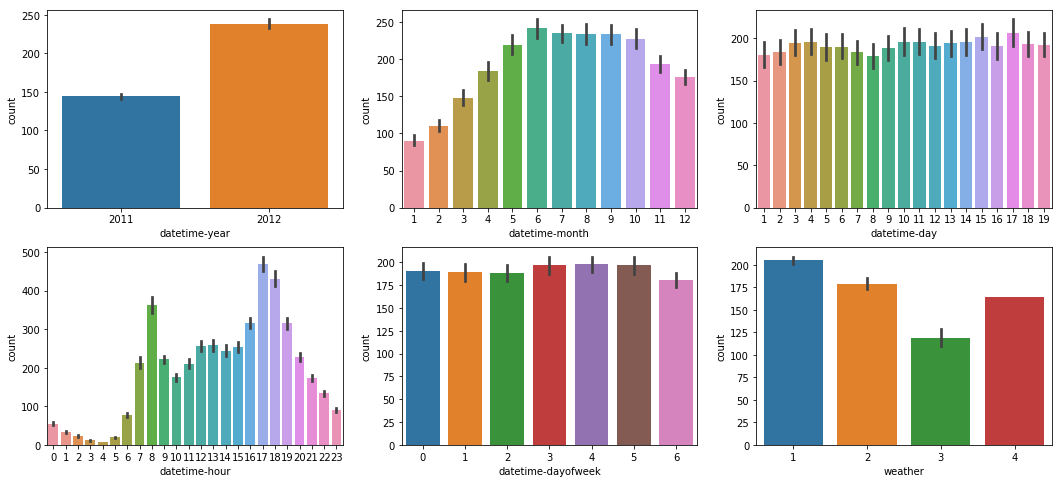

In [72]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-dayofweek', y='count', ax=ax5)
sns.barplot(data=train, x='weather', y='count', ax=ax6)

In [73]:
# datetime-year 와 datetime-month 를 합친 datetime-year-month 컬럼을 새로 생성
train['datetime-year-month'] = train['datetime-year'].astype(str) + '-' + train['datetime-month'].astype(str)
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-year-month'],
      dtype='object')

In [74]:
train['datetime-year-month'].head()

0    2011-1
1    2011-1
2    2011-1
3    2011-1
4    2011-1
Name: datetime-year-month, dtype: object

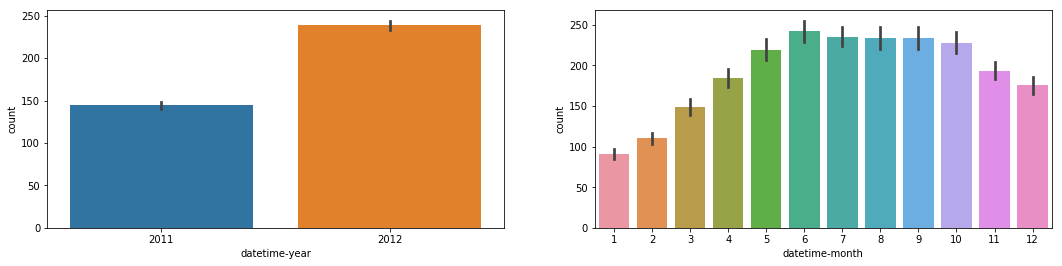

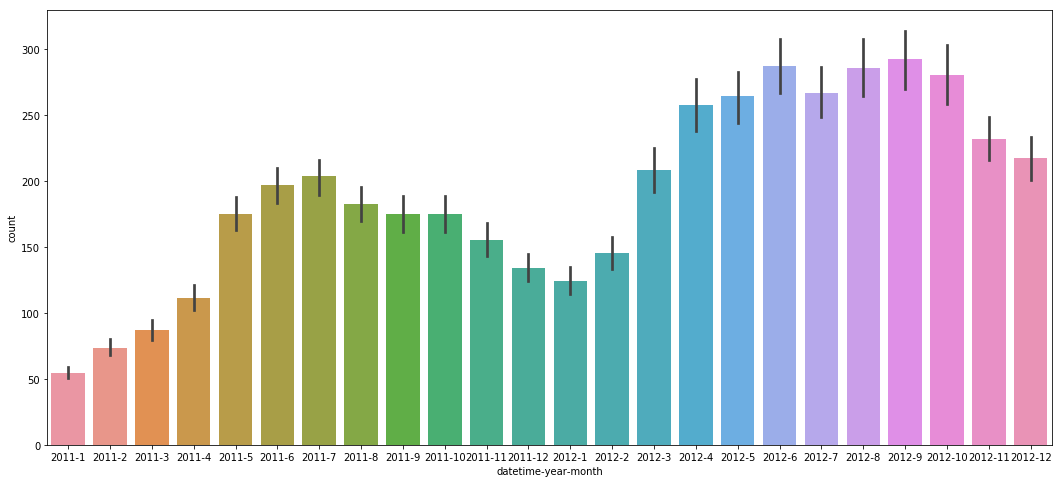

In [77]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)

firgure, ax3 = plt.subplots(nrows=1, ncols=1)
firgure.set_size_inches(18,8)
sns.barplot(data=train, x='datetime-year-month', y='count', ax=ax3)

##### 2.3 PointPlot (line graph)

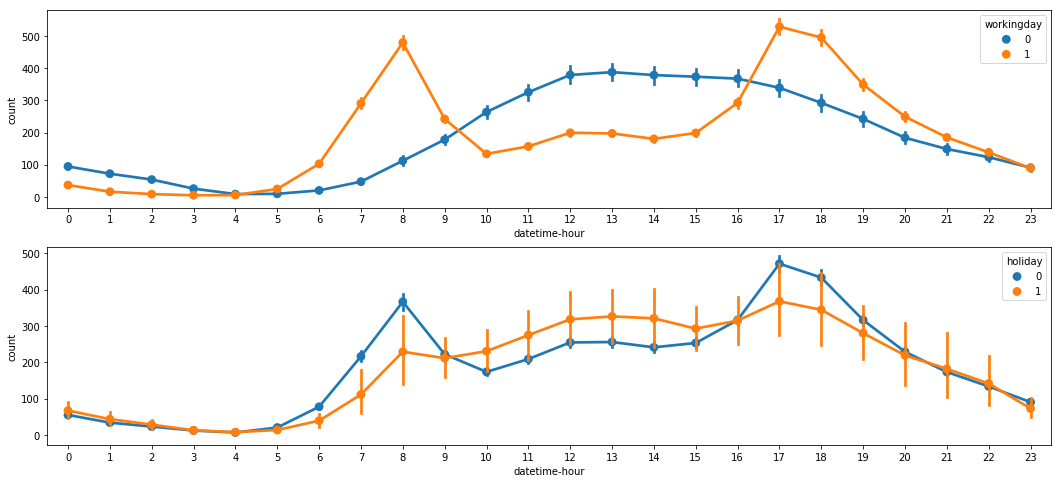

In [82]:
# workingday, holiday 분포 비교
firgure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
firgure.set_size_inches(18, 8)

# 워킹데이와 비교
sns.pointplot(data=train, x='datetime-hour', y='count', ax=ax1, hue='workingday')
# 휴일과 비교
sns.pointplot(data=train, x='datetime-hour', y='count', ax=ax2, hue='holiday')

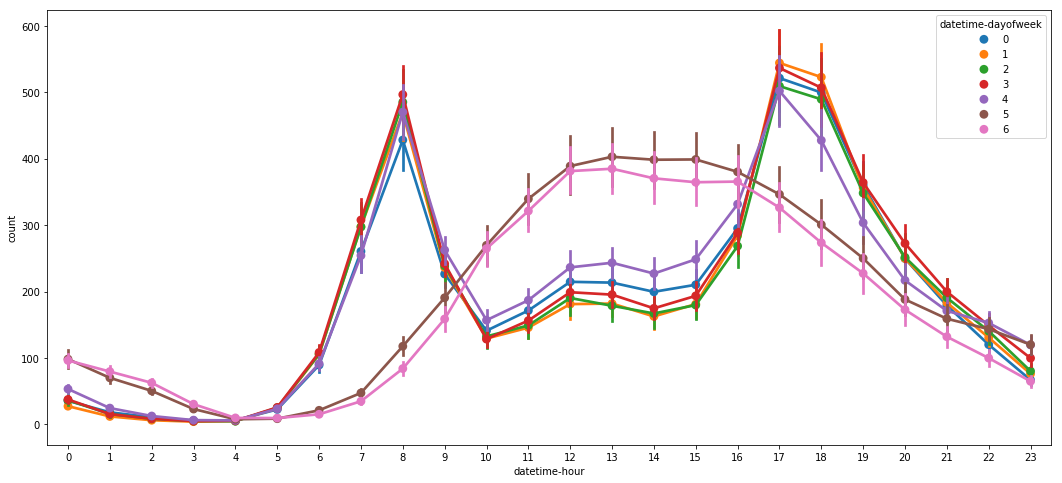

In [86]:
# datetime-hour, datetime-dayofweek
# 그래프를 통해서 datetime-dayofweek 값이 5~6 이 주말임을 알 수 있다.
firgure, ax1 = plt.subplots(nrows=1, ncols=1)
firgure.set_size_inches(18, 8)

sns.pointplot(data=train, x='datetime-hour', y='count', ax=ax1, hue='datetime-dayofweek')

##### 2.4 DistPlot (histogram)
* 데이터 분포를 확인할 수 있다.

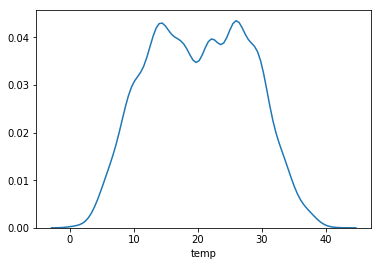

In [89]:
sns.distplot(train['temp'], hist=False)

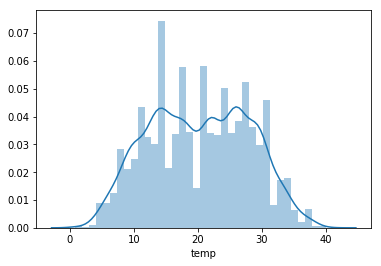

In [90]:
sns.distplot(train['temp'], hist=True)

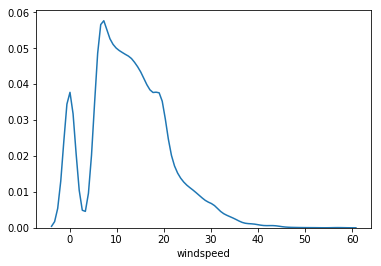

In [92]:
sns.distplot(train['windspeed'], hist=False)

(6547, 20)


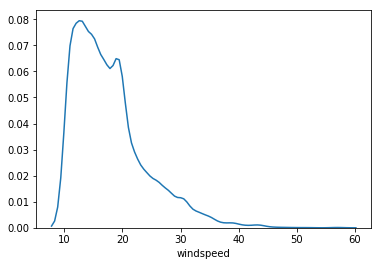

In [102]:
# windspeed 가 10 보다 큰 경우의 데이터만 그래프에 출력한다.
gt_windspeed = train[train['windspeed'] > 10]
print(gt_windspeed.shape)
sns.distplot(gt_windspeed['windspeed'], hist=False)

### 3. Train & Predict

##### 3.1 One hot encoding
* dayofweek(요일) 컬럼 : 0, 1, 2, ~ 6
* 해당 요일은 1(True), 나머지는 0(False)로 표시하는 방법

In [110]:
# 훈련 데이터 요일 컬럼을 one hot encoding
train['datetime-monday'] = train['datetime-dayofweek'] == 0
train['datetime-tuesday'] = train['datetime-dayofweek'] == 1
train['datetime-wednesday'] = train['datetime-dayofweek'] == 2
train['datetime-thursday'] = train['datetime-dayofweek'] == 3
train['datetime-friday'] = train['datetime-dayofweek'] == 4
train['datetime-saturday'] = train['datetime-dayofweek'] == 5
train['datetime-sunday'] = train['datetime-dayofweek'] == 6

print(train.shape)
train.columns

(10886, 28)


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-year-month', 'datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunnday', 'datetime-sunday'],
      dtype='object')

In [109]:
# 테스트 데이터 요일 컬럼을 one hot encoding
test['datetime-monday'] = test['datetime-dayofweek'] == 0
test['datetime-tuesday'] = test['datetime-dayofweek'] == 1
test['datetime-wednesday'] = test['datetime-dayofweek'] == 2
test['datetime-thursday'] = test['datetime-dayofweek'] == 3
test['datetime-friday'] = test['datetime-dayofweek'] == 4
test['datetime-saturday'] = test['datetime-dayofweek'] == 5
test['datetime-sunday'] = test['datetime-dayofweek'] == 6

print(test.shape)
test.columns

(6493, 23)


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek', 'datetime-monday', 'datetime-tuesday',
       'datetime-wednesday', 'datetime-thursday', 'datetime-friday',
       'datetime-saturday', 'datetime-sunday'],
      dtype='object')

##### 3.2 훈련 및 테스트 데이터 생성하기

In [128]:
# 훈련 데이터의 대상 선택은 중요하다.
feature_names_1 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',\
                 'datetime-year', 'datetime-month', 'datetime-hour', \
                 'datetime-monday', 'datetime-tuesday', 'datetime-wednesday', 'datetime-thursday', \
                 'datetime-friday', 'datetime-saturday', 'datetime-sunday']

feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',\
                 'datetime-year', 'datetime-hour', \
                 'datetime-monday', 'datetime-tuesday', 'datetime-wednesday', 'datetime-thursday', \
                 'datetime-friday', 'datetime-saturday', 'datetime-sunday']

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-monday',
 'datetime-tuesday',
 'datetime-wednesday',
 'datetime-thursday',
 'datetime-friday',
 'datetime-saturday',
 'datetime-sunday']

In [129]:
# 훈련 데이터 문제에 해당되는 DataFrame 생성하기
X_train = train[feature_names]
print(X_train.shape)
X_train.head(3)

(10886, 16)


,season,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-monday,datetime-tuesday,datetime-wednesday,datetime-thursday,datetime-friday,datetime-saturday,datetime-sunday
0,1,0,0,1,9.84,81,0.0,2011,0,False,False,False,False,False,True,False
1,1,0,0,1,9.02,80,0.0,2011,1,False,False,False,False,False,True,False
2,1,0,0,1,9.02,80,0.0,2011,2,False,False,False,False,False,True,False


In [130]:
# 테스트 데이터 문제에 해당되는 DataFrame 생성하기
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

(6493, 16)


,season,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-monday,datetime-tuesday,datetime-wednesday,datetime-thursday,datetime-friday,datetime-saturday,datetime-sunday
0,1,0,1,1,10.66,56,26.0027,2011,0,False,False,False,True,False,False,False
1,1,0,1,1,10.66,56,0.0000,2011,1,False,False,False,True,False,False,False
2,1,0,1,1,10.66,56,0.0000,2011,2,False,False,False,True,False,False,False


In [131]:
# 훈련 데이터 답(레이블)에 해당되는 DataFrame 생성하기
y_train = train['count']
print(y_train.shape)
y_train.head(3)

(10886,)


0    16
1    40
2    32
Name: count, dtype: int64

###### 3.3 학습하기
* RandomForest 알고리즘
* RandomForest 는 여러개의 결정트리들을 임의적으로 학습하는 방식의 앙상블 학습방법

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
# 고정된 값이 나오게 하기 위하여 random_state 를 설정한다.
model = RandomForestRegressor(random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [134]:
# 학습하기
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [135]:
# 예측하기
y_predictions = model.predict(X_test)
print(y_predictions.shape)
y_predictions

(6493,)


array([ 10.7,   3.6,   3.3, ..., 111.1,  88.6,  45.2])

###### 4. Submission (제출하기)

In [136]:
# samplesubmission.csv 파일 load
submit = pd.read_csv('data/bike-sharing/sampleSubmission.csv')
print(submit.shape)
submit.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [137]:
# 예측한 값(y_prediction)을 count 컬럼에 대입한다.
submit['count'] = y_predictions
print(submit.shape)
submit.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.7
1,2011-01-20 01:00:00,3.6
2,2011-01-20 02:00:00,3.3


In [138]:
# submit DataFrame 을 제출할 csv 파일로 write
submit.to_csv('data/bike-sharing/bike_02.csv', index=False)